Reading Standard Workload File

In [36]:
FEATURES_NUMBER = 18
with open('test2.txt', 'r+', encoding='utf-8') as f:
    data = f.read().splitlines(True)
    
data = [ line.replace('\n', '').replace('\t', ' ').split() for line in data if not line.startswith(';')]
data = [[float(value) for value in line] for line in data if len(line) == FEATURES_NUMBER]
print(data[:10])
print(len(data))

[[1.0, 0.0, 3.0, 169.0, 1.0, 161.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0], [2.0, 0.0, 7.0, 56212.0, 1.0, 49351.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 2.0, 1.0, 2.0, -1.0, -1.0, -1.0, -1.0], [3.0, 1.0, 43.0, 2.0, 1.0, -1.0, 16777216.0, -1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 3.0, -1.0, -1.0, -1.0, -1.0], [4.0, 1.0, 1967.0, 116.0, 1.0, 41.0, 4194304.0, -1.0, -1.0, -1.0, 1.0, 4.0, 2.0, 4.0, -1.0, -1.0, -1.0, -1.0], [5.0, 3.0, 9.0, 0.0, 1.0, -1.0, 2097152.0, -1.0, -1.0, -1.0, 0.0, 5.0, 1.0, 5.0, -1.0, -1.0, -1.0, -1.0], [6.0, 3.0, 11.0, 3.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [7.0, 3.0, 9.0, 22.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [8.0, 3.0, 8.0, 191.0, 1.0, 184.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0], [9.0, 4.0, 18.0, 3.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [10.0, 4.0, 18.0, 11.0, 1

Converting it to pandas dataframe, removing not needed columns

In [37]:
import numpy as np
import pandas as pd

np_data = np.array(data, dtype=int)
print(np_data.shape)

labels = ['submit time', 'wait time', 'run time', 'proc used', 'requested number of proc', 'requested time', 'requested memory', 'user id']
np_data = np.delete(np_data, [0, 5, 6, 10, 12, 13, 14, 15, 16, 17], 1)
print(np_data.shape)
print(len(labels))
df = pd.DataFrame(np_data, columns=labels)
print(df.head())

(13085792, 18)
(13085792, 8)
8
   submit time  wait time  run time  proc used  requested number of proc  \
0            0          3       169          1                        -1   
1            0          7     56212          1                        -1   
2            1         43         2          1                        -1   
3            1       1967       116          1                        -1   
4            3          9         0          1                        -1   

   requested time  requested memory  user id  
0              -1                -1        1  
1              -1                -1        2  
2              -1                -1        3  
3              -1                -1        4  
4              -1                -1        5  


Grouping by user id

In [38]:
max_submit_time = df.max()['submit time']
df.pop('submit time')
df['count'] = df.groupby('user id')['user id'].transform('count')
grouped = df.groupby('user id').mean()
print(grouped.head())
user_profiles = grouped.to_numpy()

           wait time      run time  proc used  requested number of proc  \
user id                                                                   
1          57.500774    429.766585        1.0                      -1.0   
2         326.172665  38658.537339        1.0                      -1.0   
3         723.267009    654.423359        1.0                      -1.0   
4        1383.196786   1801.090909        1.0                      -1.0   
5          16.771935   3706.631587        1.0                      -1.0   

         requested time  requested memory    count  
user id                                             
1                  -1.0              -1.0  15496.0  
2                  -1.0              -1.0  47404.0  
3                  -1.0              -1.0  15977.0  
4                  -1.0              -1.0   9955.0  
5                  -1.0              -1.0  46114.0  


Visualizing data

In [39]:
import matplotlib.pyplot as plt
def plot_2d_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(12, 12)
    plt.prism()
    
    for i in np.unique(y):
        cluster = (y == i)

        dim0 = X[cluster, 0]
        dim1 = X[cluster, 1]
        label = f"Cluster {i}"
        plot.scatter(dim0, dim1, label=label)
    
    plot.set_xticks(())
    plot.set_yticks(())

    plt.title("Workload logs")
    plt.tight_layout()
    plt.legend()
    plt.show()

In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(user_profiles)
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [41]:
from sklearn.manifold import TSNE

user_profiles_tsne = TSNE(n_components=2, metric='euclidean', perplexity=30).fit_transform(user_profiles)
user_profiles_tsne.shape

/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1614, 2)

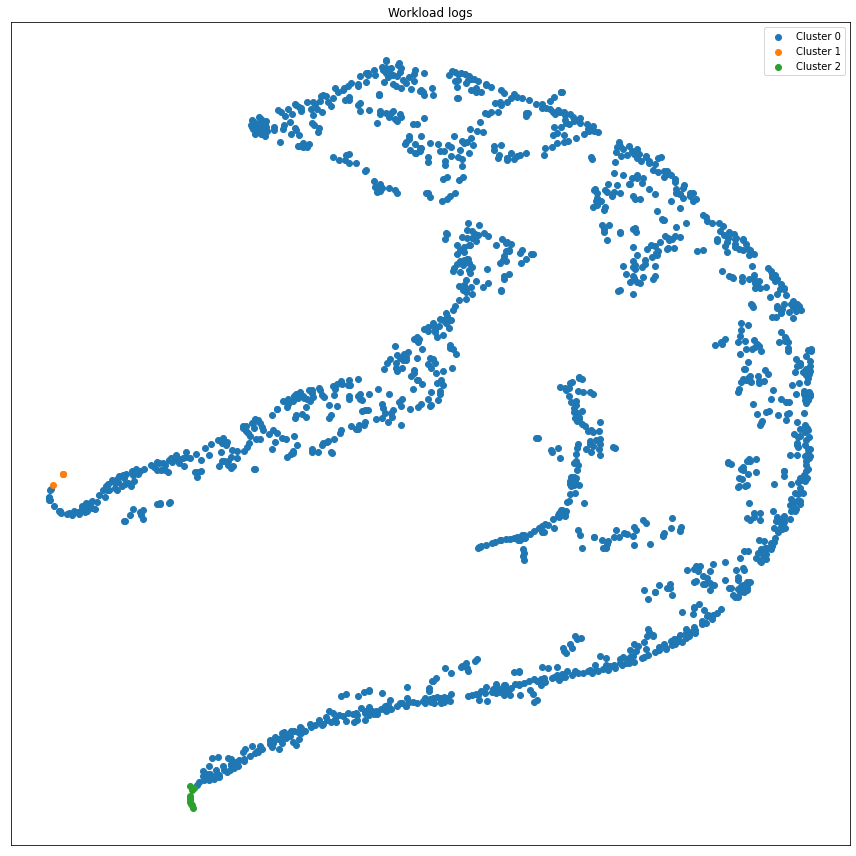

In [54]:
plot_2d_scatter(user_profiles_tsne, kmeans.labels_)

In [51]:
from sklearn.decomposition import PCA

user_profiles_pca = PCA(n_components=2).fit_transform(user_profiles)
print(user_profiles_pca.shape)

(1614, 2)


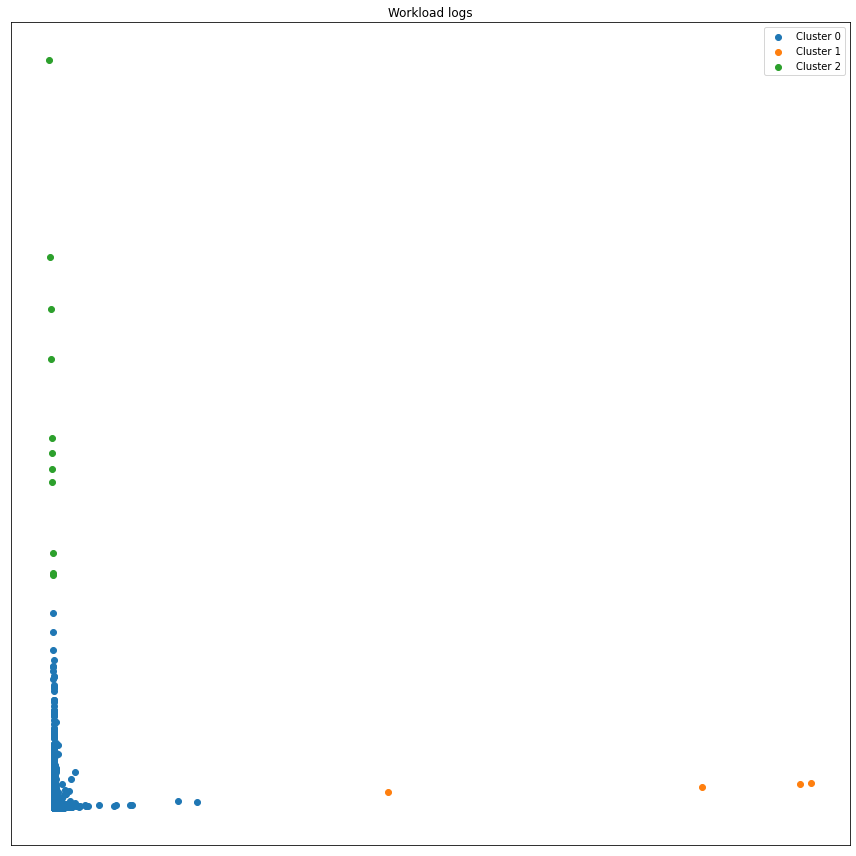

In [55]:
plot_2d_scatter(user_profiles_pca, kmeans.labels_)